<a href="https://colab.research.google.com/github/zmiern/ie423/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
dfData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/final_data 3.csv')

In [9]:
dfData.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [10]:
dfData.describe(include='all')

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754,10754,10754,10754,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,...,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
unique,10754,374,10584,16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,46,6,1821,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,...,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,NaN,NaN,NaN,NaN,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,...,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,NaN,NaN,NaN,NaN,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,...,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,...,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,NaN,NaN,NaN,NaN,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,...,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000


#Explore Data

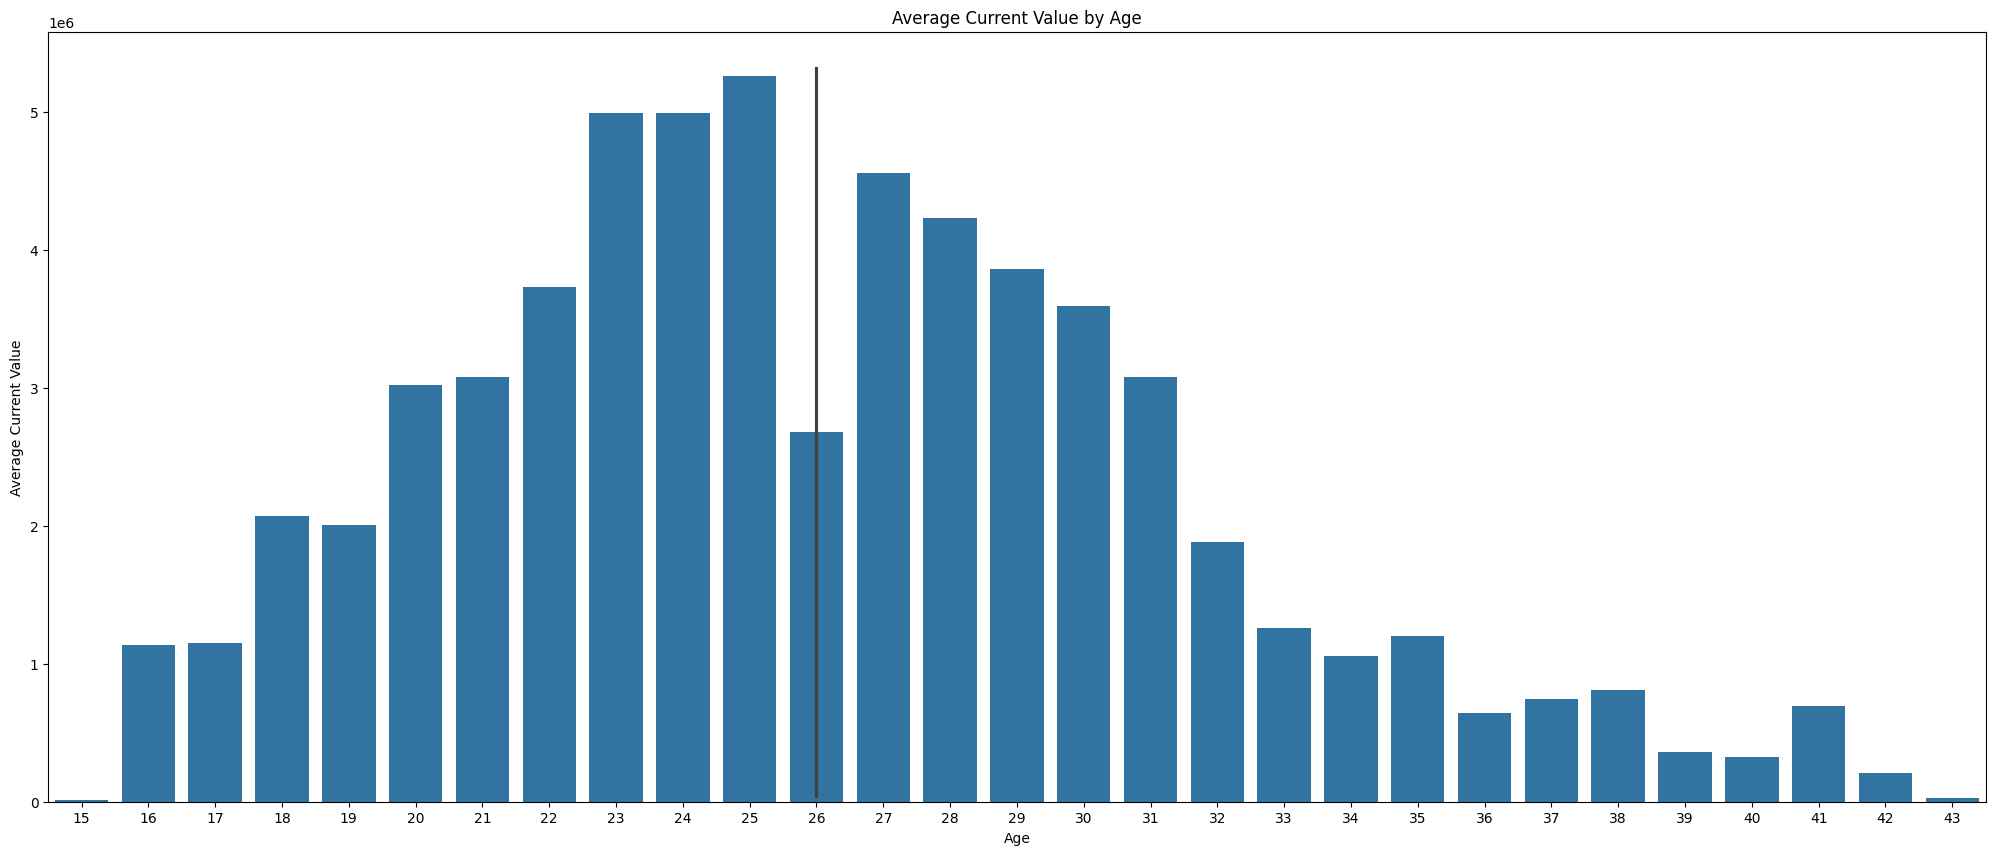

In [12]:
avg_value_by_age = dfData.groupby('age')['current_value'].mean()

plt.figure(figsize=(25, 10))
sns.barplot(x=avg_value_by_age.index.astype(int), y=avg_value_by_age.values)
plt.title("Average Current Value by Age")
plt.xlabel("Age")
plt.ylabel("Average Current Value")
plt.show()

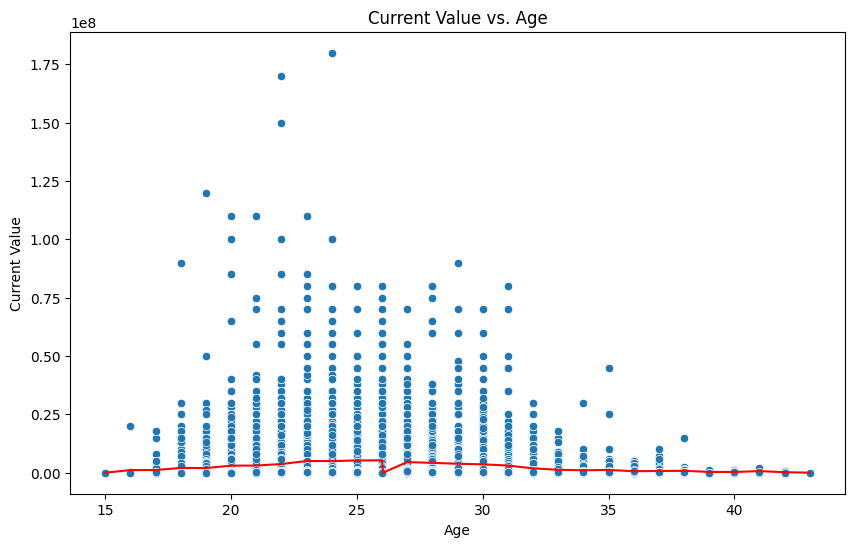

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dfData.loc[:,'age'], y=dfData.loc[:,'current_value'])
sns.lineplot(x=dfData.loc[:,'age'], y=dfData.loc[:,'current_value'], errorbar=None, estimator='mean', color='red')
plt.title("Current Value vs. Age")
plt.xlabel("Age")
plt.ylabel("Current Value")
plt.show()


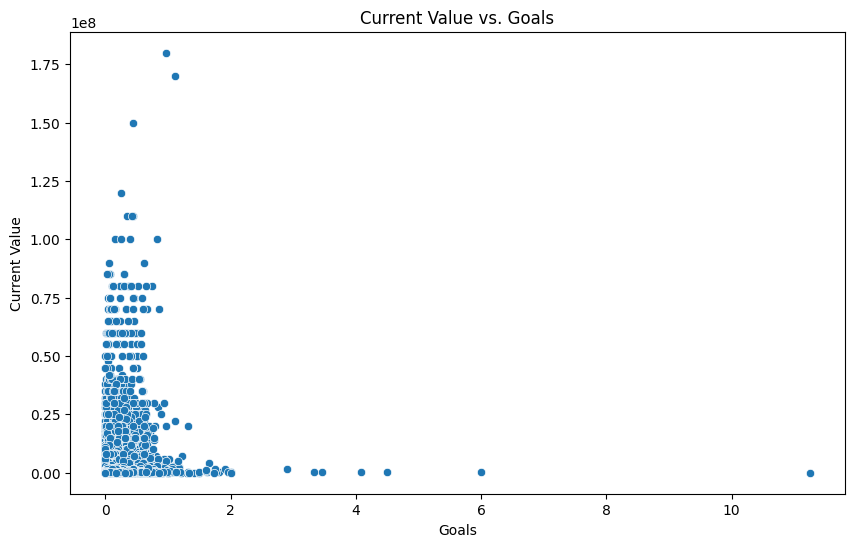

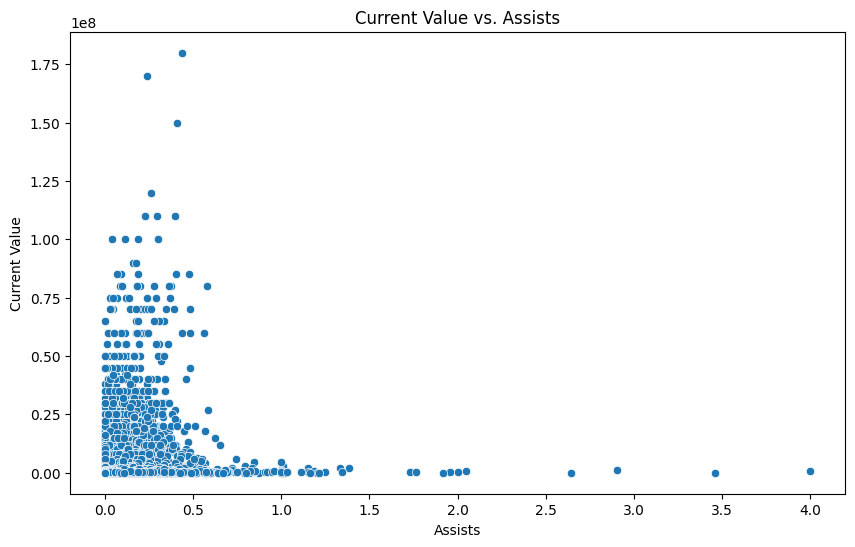

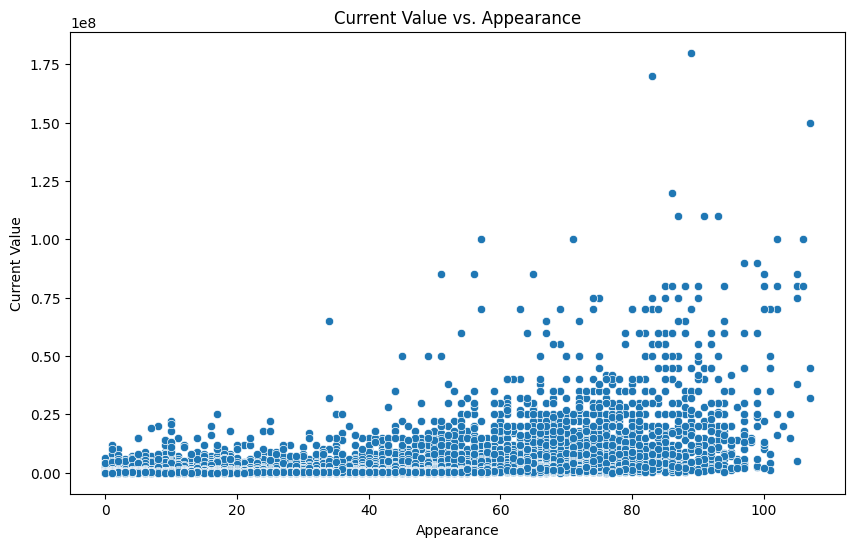

In [13]:
# Scatter plots of performance metrics against current value
metrics = ['goals', 'assists', 'appearance'] # Use column names as strings


for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=dfData[metric], y=dfData['current_value']) # Access columns using strings
    plt.title(f"Current Value vs. {metric.capitalize()}")
    plt.xlabel(metric.capitalize())
    plt.ylabel("Current Value")
    plt.show()

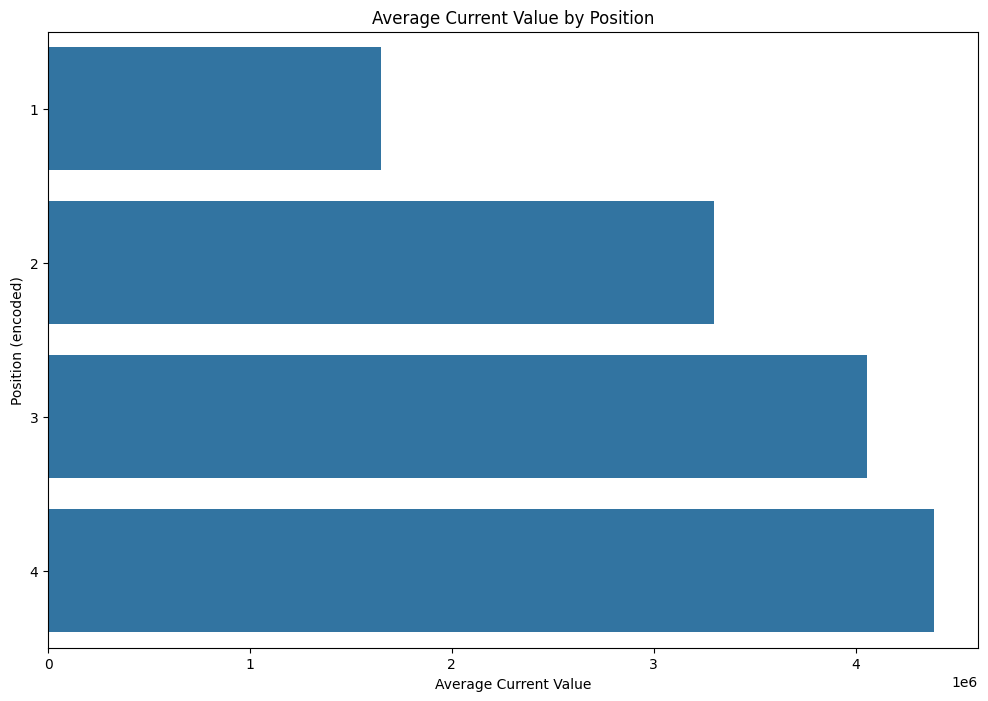

In [14]:
# Calculate the average current value by position
avg_value_by_position = dfData.groupby('position_encoded')['current_value'].mean().sort_values(ascending=False)

# Plot the average current value by position
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_value_by_position.values, y=avg_value_by_position.index, orient='h')
plt.title("Average Current Value by Position")
plt.xlabel("Average Current Value")
plt.ylabel("Position (encoded)")
plt.show()

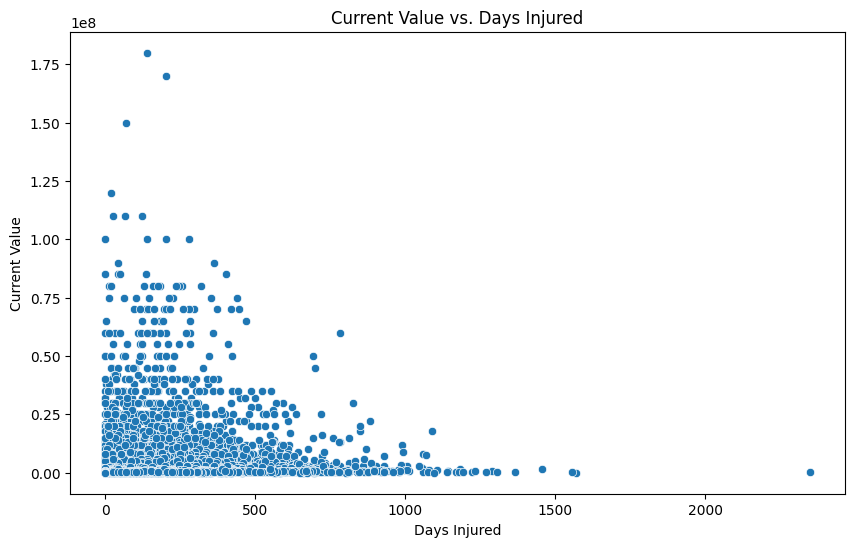

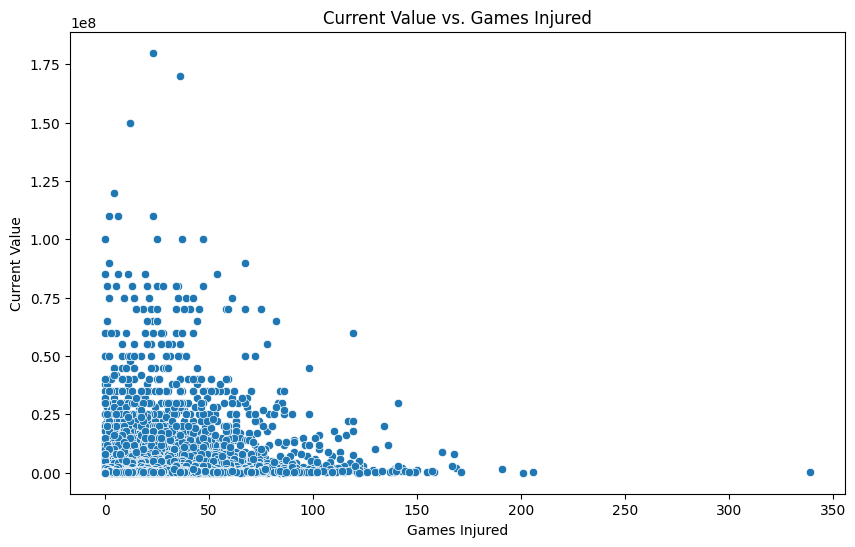

In [15]:
# Scatter plot of current value vs. days injured
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dfData['days_injured'], y=dfData['current_value'])
plt.title("Current Value vs. Days Injured")
plt.xlabel("Days Injured")
plt.ylabel("Current Value")
plt.show()

# Scatter plot of current value vs. games injured
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dfData['games_injured'], y=dfData['current_value'])
plt.title("Current Value vs. Games Injured")
plt.xlabel("Games Injured")
plt.ylabel("Current Value")
plt.show()

In [24]:
#all info except current value
attributes_for_x= ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       'minutes played', 'days_injured', 'games_injured', 'award',
       'highest_value', 'position_encoded', 'winger']

x = dfData[attributes_for_x].values
y = dfData['current_value'].values

model = LinearRegression()
model.fit(x, y)

y_exp = model.predict(x)



MSE = np.mean((y - y_exp) ** 2)
print(f'\nMean Squared Error: {MSE}')


print("\nModel intercept:")
print(model.intercept_)
print("\nModel coefficients:")
print(model.coef_)


Mean Squared Error: 20520701586738.805

Model intercept:
5247419.389268731

Model coefficients:
[ 9.89314087e+02 -2.17861486e+05 -5.13428517e+04  7.88280676e+05
  1.14351893e+06  7.25782768e+04 -6.68146303e+04 -1.80851641e+05
 -2.86983947e+05  3.15391607e+04  1.16513387e+03  4.20483178e+03
 -4.93139021e+04 -3.33018992e+05  6.05783517e-01 -3.17578086e+04
 -5.73633282e+04]


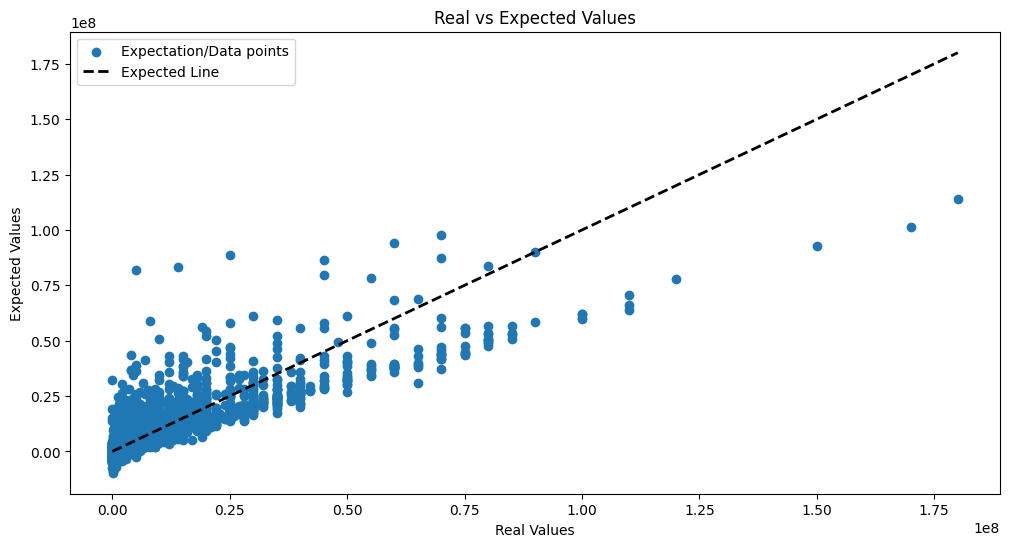

In [25]:
plt.figure(figsize=(12, 6))
plt.scatter(y, y_exp, label='Expectation/Data points')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Expected Line')
plt.xlabel('Real Values')
plt.ylabel('Expected Values')
plt.title('Real vs Expected Values')
plt.legend()
plt.show()

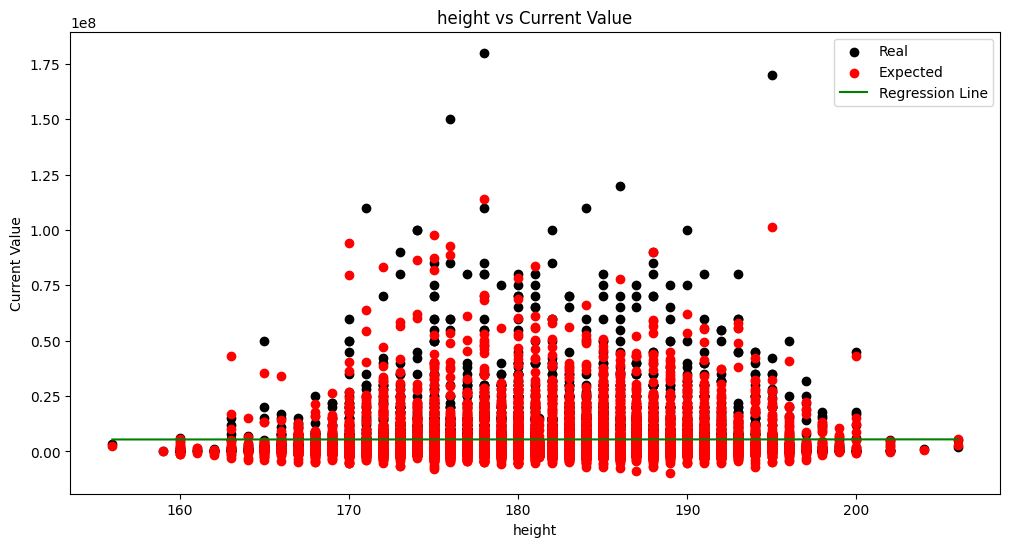

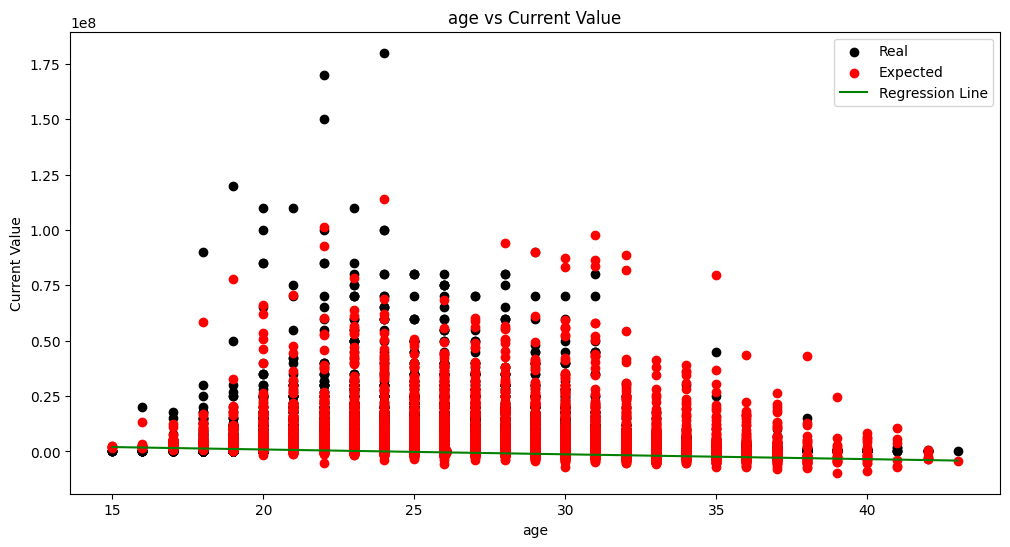

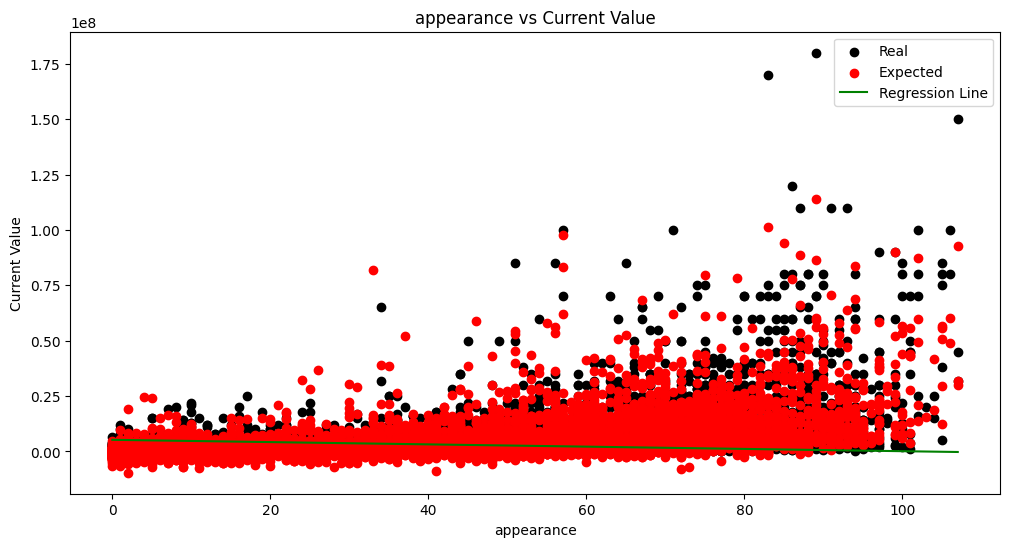

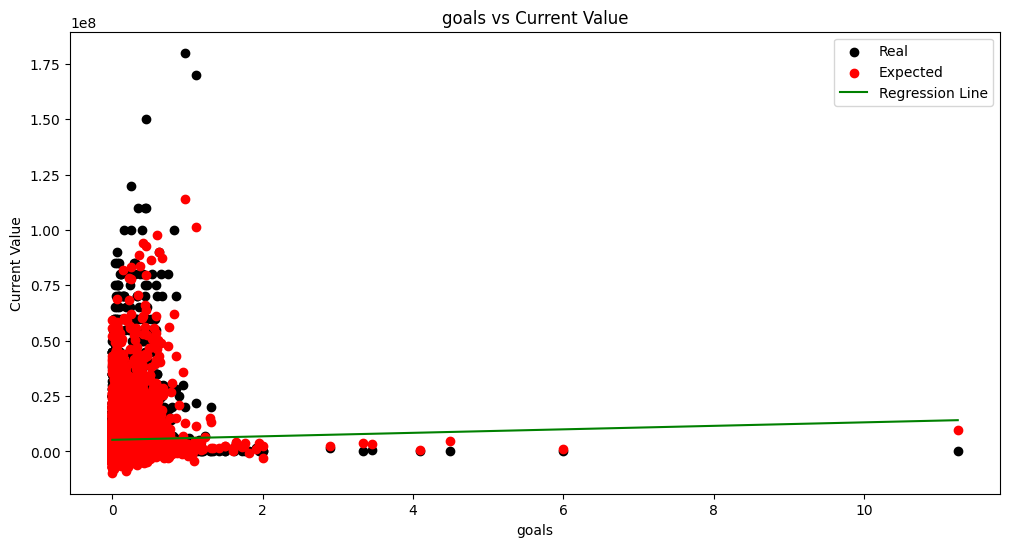

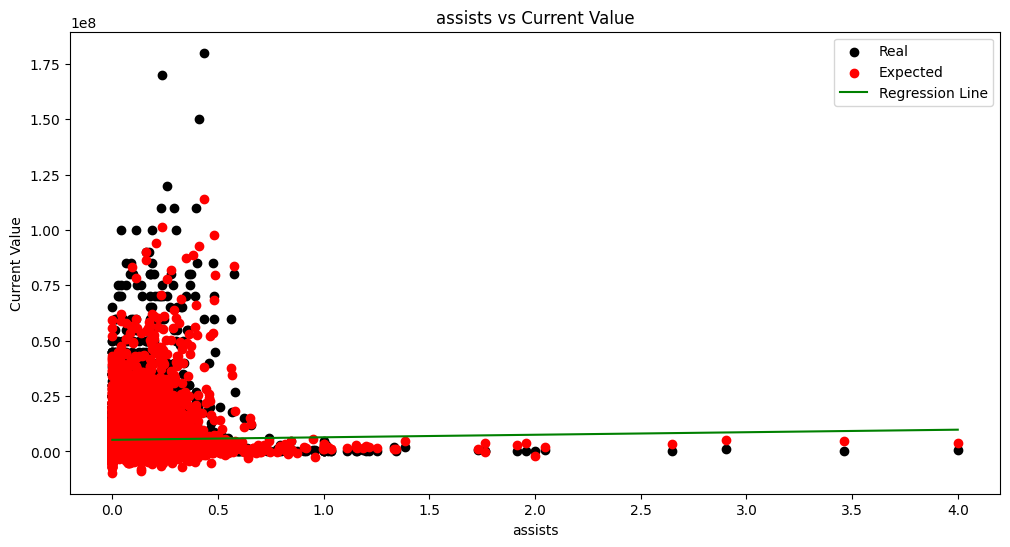

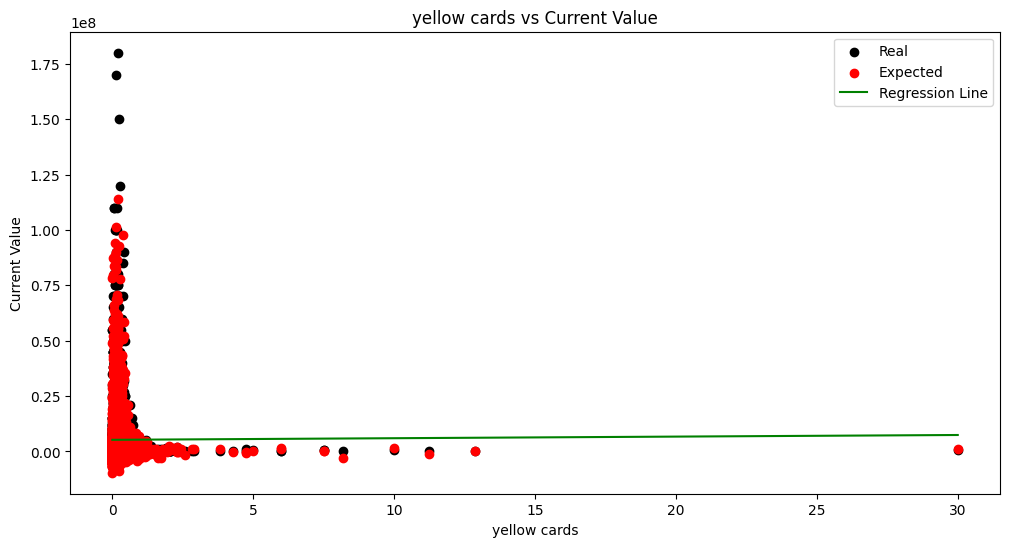

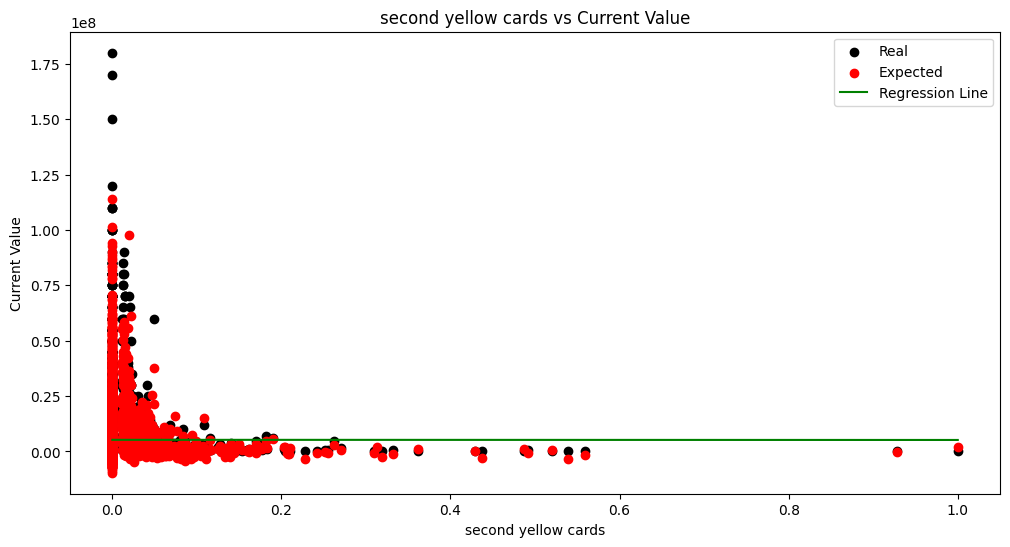

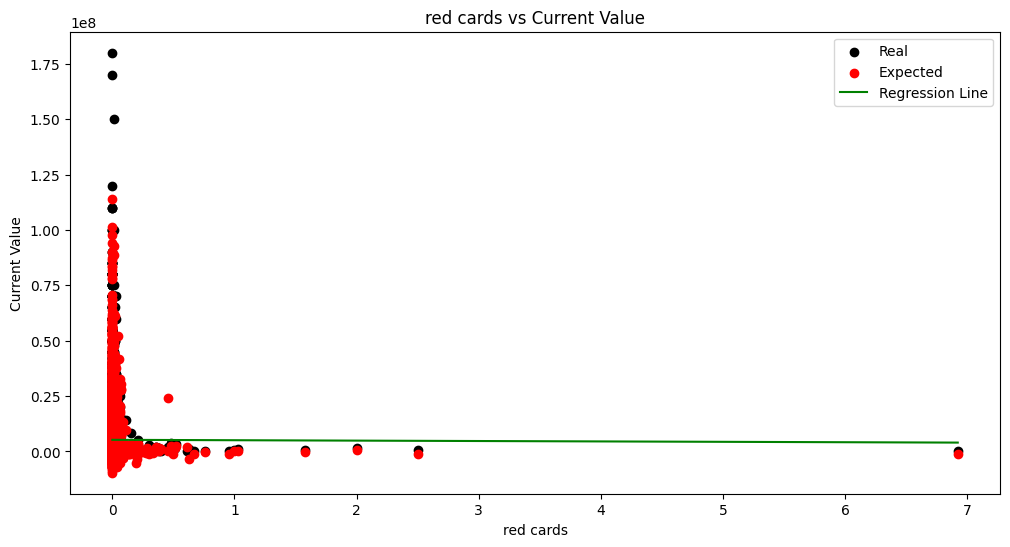

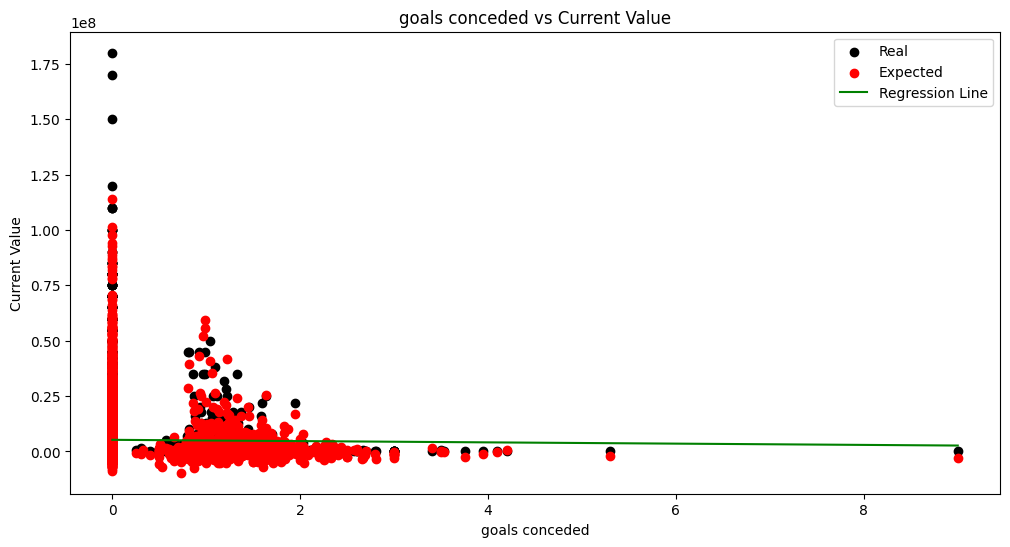

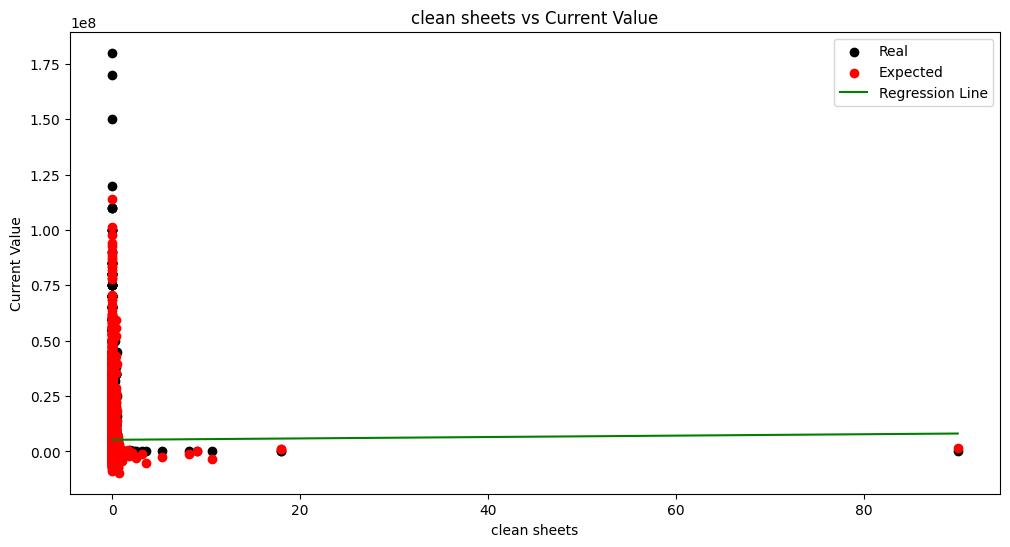

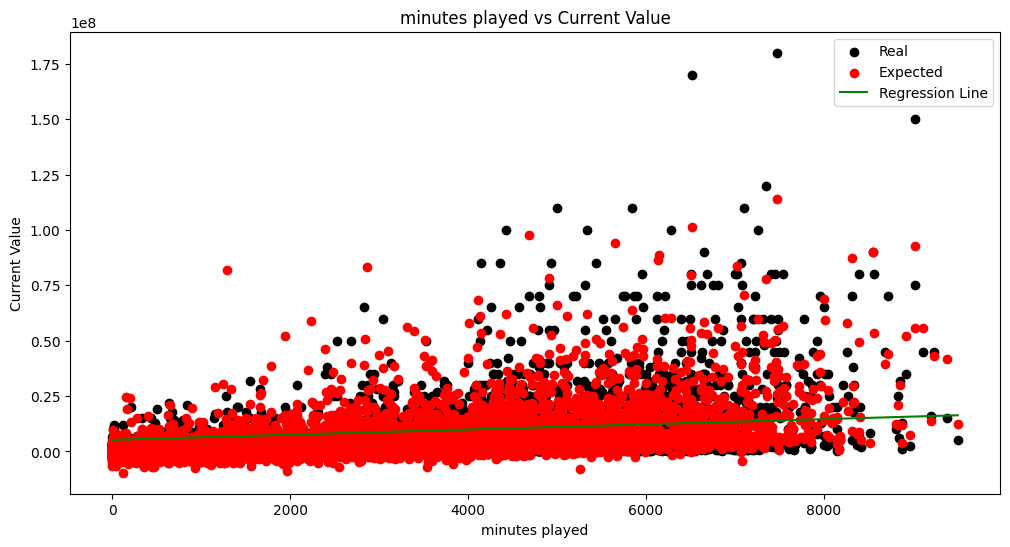

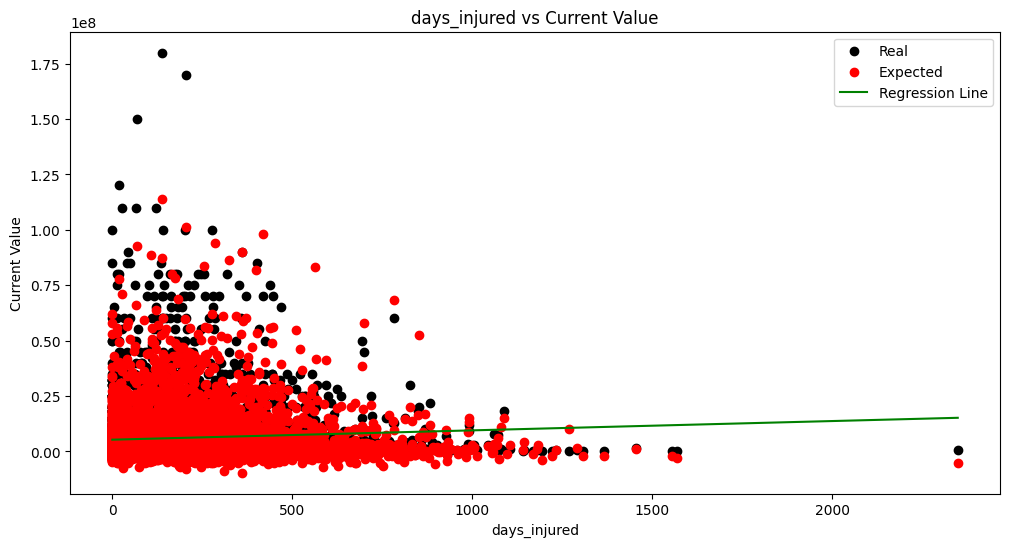

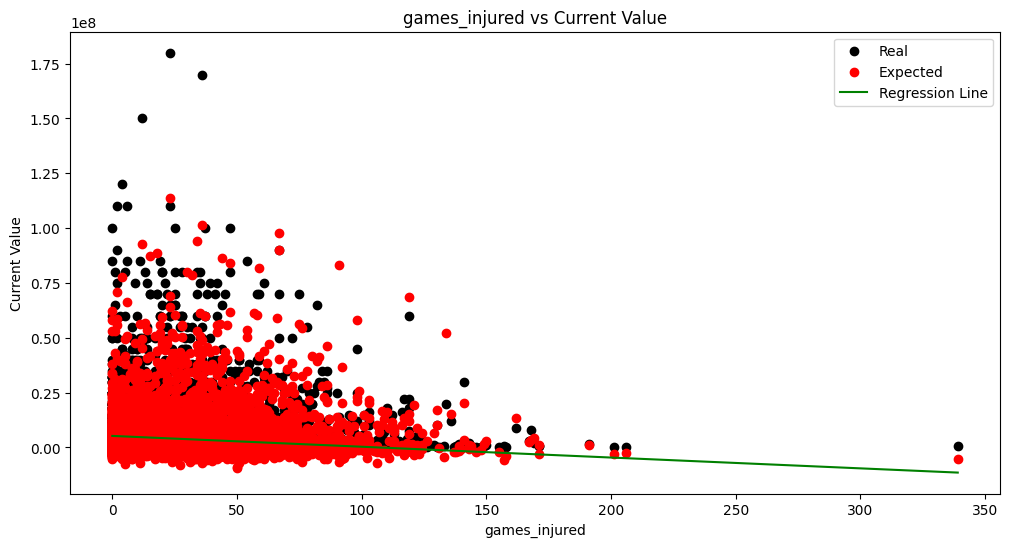

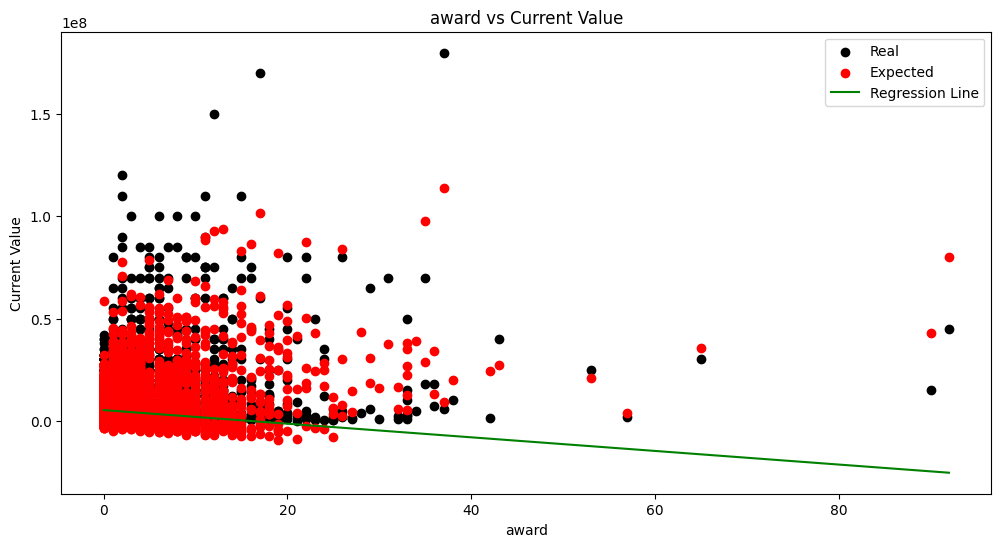

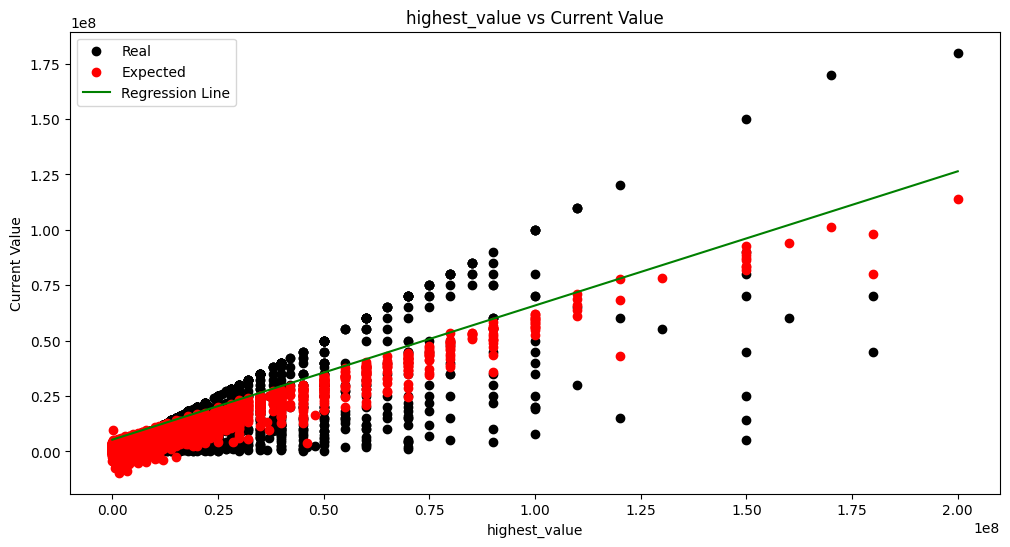

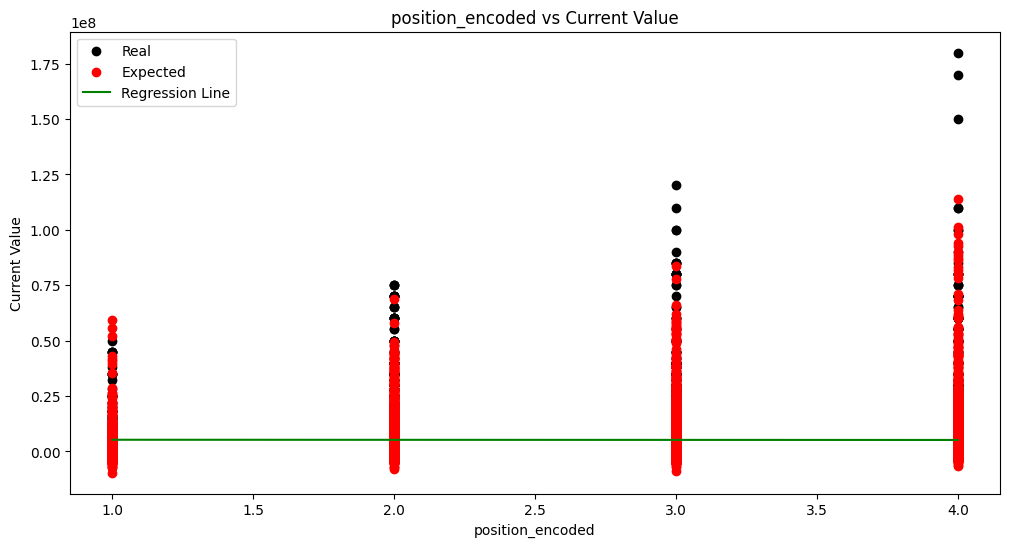

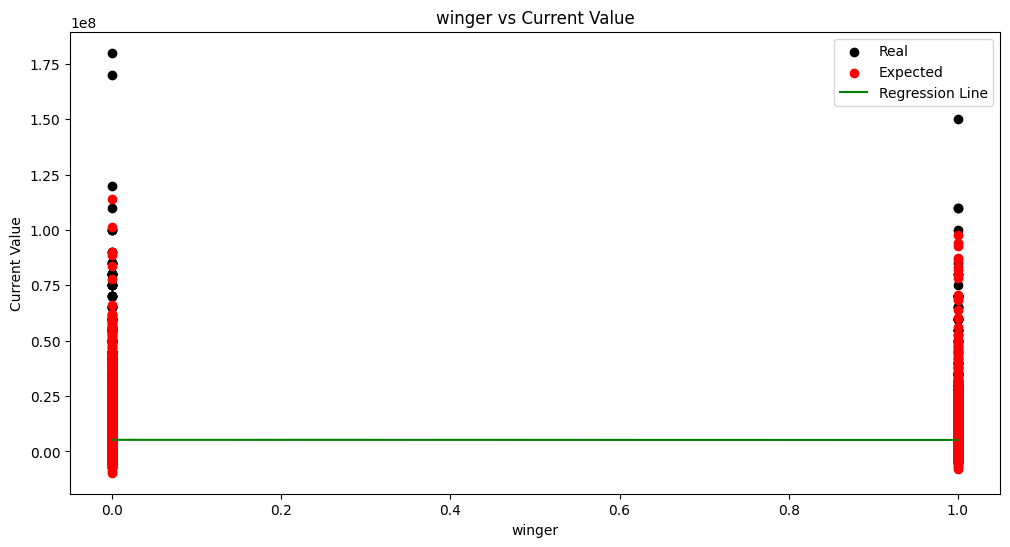

In [26]:
# Linear regression plot for each feature
for i, feature in enumerate(attributes_for_x):
    plt.figure(figsize=(12, 6))  # Single regression plot size
    plt.scatter(x[:, i], y, color='black', label='Real')
    plt.scatter(x[:, i], y_exp, color='red', label='Expected')

    # Regression line
    x_range = np.linspace(x[:, i].min(), x[:, i].max())
    y_range = model.intercept_ + model.coef_[i] * x_range
    plt.plot(x_range, y_range, color='green', label='Regression Line')

    plt.xlabel(feature)
    plt.ylabel('Current Value')
    plt.title(f'{feature} vs Current Value')
    plt.legend()
    plt.show()
